In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [2]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\user\AppData\Local\Temp\ipykernel_14708\3780938124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


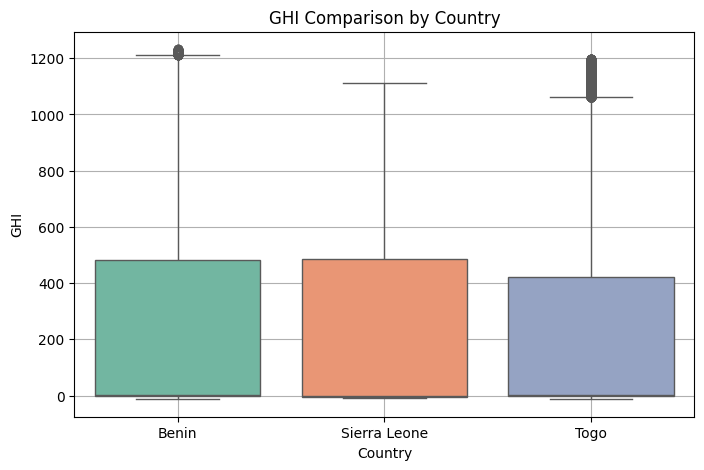

C:\Users\user\AppData\Local\Temp\ipykernel_14708\3780938124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


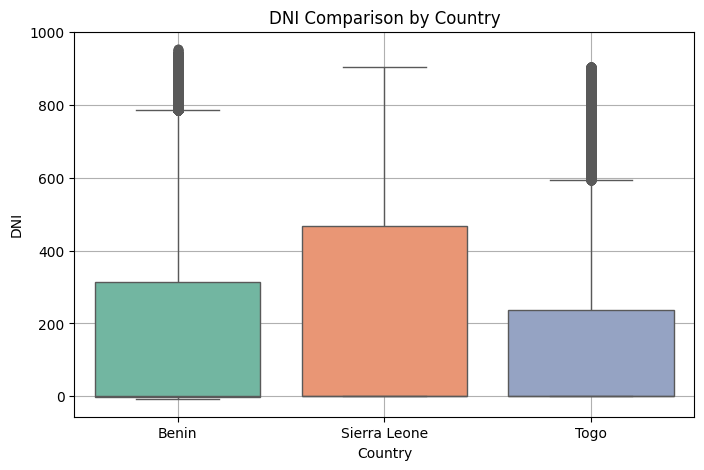

C:\Users\user\AppData\Local\Temp\ipykernel_14708\3780938124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


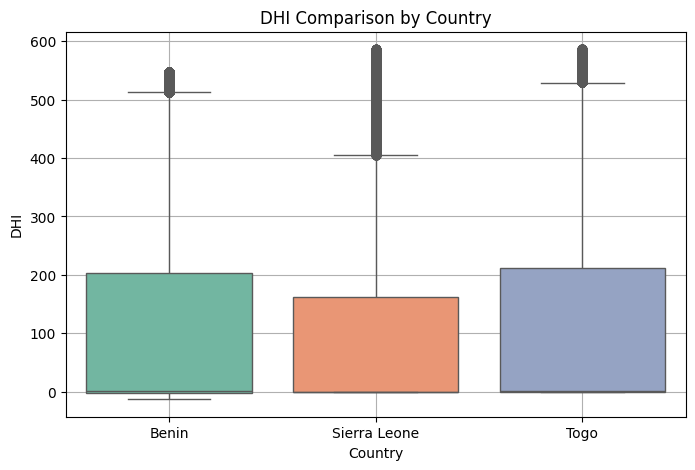

In [3]:
metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")
    plt.title(f"{metric} Comparison by Country")
    plt.grid(True)
    plt.show()


In [4]:
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary.reset_index(inplace=True)
summary

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.319648,1.8,330.856194,167.186301,-0.1,261.714909,106.067816,1.5,147.230161
1,Sierra Leone,228.229079,-1.9,319.641687,213.292251,0.0,298.759612,86.344994,0.0,118.659212
2,Togo,223.859675,0.5,317.306277,147.975931,0.0,247.683690,112.781249,1.5,151.571744


In [5]:
# Option 1: ANOVA (Assumes normality)
anova = f_oneway(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

# Option 2: Kruskal-Wallis (Non-parametric)
kruskal_test = kruskal(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print("ANOVA p-value:", anova.pvalue)
print("Kruskal-Wallis p-value:", kruskal_test.pvalue)


ANOVA p-value: 3.491067956568229e-151
Kruskal-Wallis p-value: 0.0


C:\Users\user\AppData\Local\Temp\ipykernel_14708\187524067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="coolwarm")


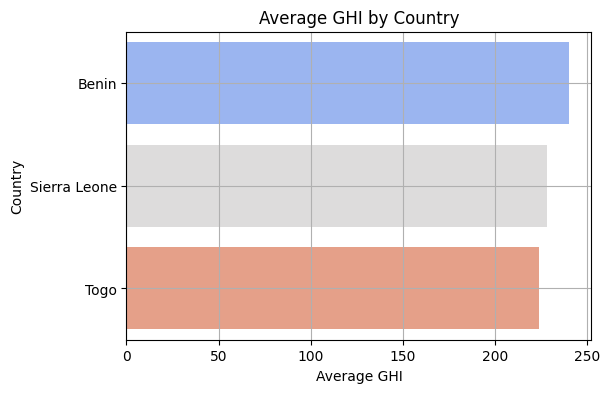

In [6]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="coolwarm")
plt.title("Average GHI by Country")
plt.xlabel("Average GHI")
plt.grid(True)
plt.show()


### Key Observations

- **Benin** exhibits the **highest average GHI (240.32)** and **DHI (106.07)**, suggesting it receives the most consistent and diffuse solar radiation — making it a strong candidate for solar panel deployment even on cloudy days.

- **Sierra Leone**, while having a lower average GHI, stands out with the **highest average DNI (213.29)** — indicating strong potential for **concentrated solar power (CSP)** solutions where direct sunlight is crucial.

- **Togo** shows **the most balanced DHI and GHI** values, but also comes with the **highest variability in DHI** (std: 151.57), suggesting unpredictable weather patterns that could affect solar yield stability.

- Both ANOVA and Kruskal–Wallis tests produced extremely low p-values (p < 0.001), strongly indicating that the observed differences in GHI values across Benin, Sierra Leone, and Togo are statistically significant and not due to random variation. This confirms that country-specific factors contribute meaningfully to solar potential differences and merit deeper analysis.
